# GARCH

In [ ]:
from datetime import datetime, timedelta, date
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf

In [ ]:
stock_symbol = "BA"
end_date = date.today()
start_date = end_date - timedelta(days=365 * 5) 

df_b = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
close = df_b['Close']
close = close.dropna()
returns = close.diff()[1:]

Text(0.5, 1.0, 'BA Returns')

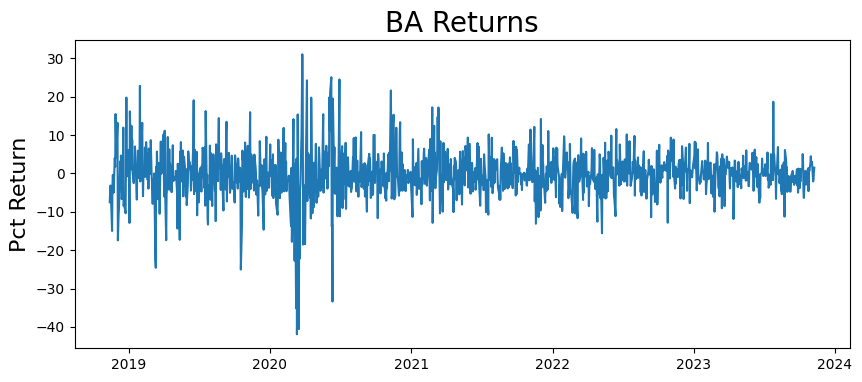

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('BA Returns', fontsize=20)

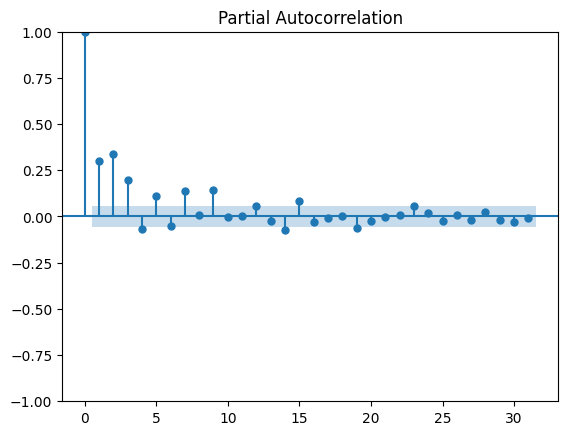

In [ ]:
plot_pacf(returns**2)
plt.show()

### GARCH(3,3)

In [ ]:
model = arch_model(returns, p=3, q=3)


In [ ]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 536162.2674392718
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4510.457480472916
Iteration:      3,   Func. Count:     32,   Neg. LLF: 4368.330022641501
Iteration:      4,   Func. Count:     43,   Neg. LLF: 4035.178416852243
Iteration:      5,   Func. Count:     53,   Neg. LLF: 3962.2578361124197
Iteration:      6,   Func. Count:     63,   Neg. LLF: 4186.806974732475
Iteration:      7,   Func. Count:     73,   Neg. LLF: 3948.0400990051603
Iteration:      8,   Func. Count:     83,   Neg. LLF: 3957.7354671610306
Iteration:      9,   Func. Count:     93,   Neg. LLF: 3941.6624503893827
Iteration:     10,   Func. Count:    102,   Neg. LLF: 3941.3666303605914
Iteration:     11,   Func. Count:    111,   Neg. LLF: 3941.6106654206337
Iteration:     12,   Func. Count:    121,   Neg. LLF: 3941.3314513501045
Iteration:     13,   Func. Count:    131,   Neg. LLF: 3941.272664775581
Iteration:     14,   Func. Count:    140,   Neg. LLF: 394

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3941.27
Distribution:                  Normal   AIC:                           7898.54
Method:            Maximum Likelihood   BIC:                           7939.63
                                        No. Observations:                 1256
Date:                Fri, Nov 10 2023   Df Residuals:                     1255
Time:                        16:21:36   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0347      0.141     -0.246      0.806 [ -0.311,  0.242]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7741      2.390      0.742      0.458    [ -2.910,  6.458]
alpha[1]       0.0936  3.705e-02      2.527  1.149e-02  [2.102e-02,  0.166]
alpha[2]       0.0466  5.808e-02      0.803      0.422 [-6.722e-02,  0.160]
alpha[3]       0.0000  6.257e-02      0.000      1.000    [ -0.123,  0.123]
beta[1]        0.2920      0.292      1.001      0.317    [ -0.279,  0.863]
beta[2]    3.9225e-13      0.235  1.669e-12      1.000    [ -0.461,  0.461]
beta[3]        0.5145      0.174      2.959  3.085e-03    [  0.174,  0.855]
===========================================================================

Covariance estimator: robust
"""

### GARCH(3,0) = ARCH(3)

In [ ]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4776.276334282904
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4074.600477215743
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5115.329277979575
Iteration:      4,   Func. Count:     31,   Neg. LLF: 4100.445121632085
Iteration:      5,   Func. Count:     39,   Neg. LLF: 8252.018794793094
Iteration:      6,   Func. Count:     46,   Neg. LLF: 4010.8765276198606
Iteration:      7,   Func. Count:     53,   Neg. LLF: 3967.6121406863326
Iteration:      8,   Func. Count:     59,   Neg. LLF: 3967.541779833985
Iteration:      9,   Func. Count:     65,   Neg. LLF: 3967.535767266465
Iteration:     10,   Func. Count:     71,   Neg. LLF: 3967.5344656765105
Iteration:     11,   Func. Count:     77,   Neg. LLF: 3967.534389755594
Iteration:     12,   Func. Count:     83,   Neg. LLF: 3967.5343839088923
Iteration:     13,   Func. Count:     88,   Neg. LLF: 3967.5343839087836
Optimization terminated successfully    (Exit mode 0)
     

In [ ]:
# Wszystkie alpha są istotne - dobry model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3967.53
Distribution:                  Normal   AIC:                           7945.07
Method:            Maximum Likelihood   BIC:                           7970.75
                                        No. Observations:                 1256
Date:                Fri, Nov 10 2023   Df Residuals:                     1255
Time:                        16:25:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0246      0.143      0.172      0.864 [ -0.256,  0.305]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         20.0278      2.049      9.776  1.434e-22   [ 16.012, 24.043]
alpha[1]       0.1909  4.506e-02      4.238  2.258e-05   [  0.103,  0.279]
alpha[2]       0.1369  4.891e-02      2.800  5.111e-03 [4.108e-02,  0.233]
alpha[3]       0.1304  5.381e-02      2.424  1.536e-02 [2.495e-02,  0.236]
==========================================================================

Covariance estimator: robust
"""

### Test

365 latest days

In [ ]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

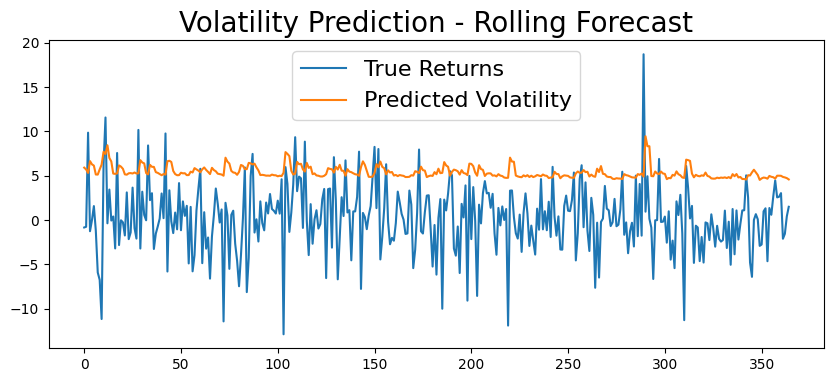

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:].reset_index(drop=True))
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

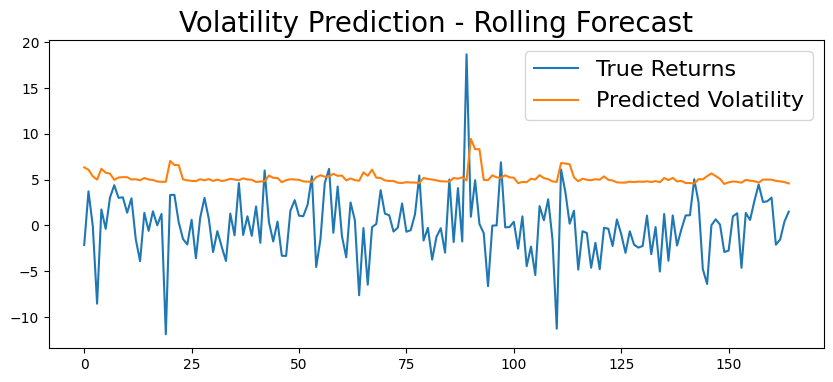

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365+200:].reset_index(drop=True))
preds, = plt.plot(rolling_predictions[200:])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)